In [ ]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy  
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

In [ ]:
import pandas as pd
import math
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Domain_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MLDOMAIN_BRY.csv")
Domain_data.drop(["Unnamed: 0"], axis=1, inplace=True)
Domain_data.head()

,domain_name,label,domain,length,entropy,first_Digit_Index,H_entropy,vowel_consonant_ratio,vowel_character_ratio,consonant_character_ratio,level_no,alexa_grams,words_grams
0,odqzesdvd.info,dga,odqzesdvd,9,2.641604,0,3.324863,0.444444,0.285714,0.642857,2,8.618689,10.200253
1,mcrwnxdzu.info,dga,mcrwnxdzu,9,3.169925,0,3.664498,0.300000,0.214286,0.714286,2,5.331953,4.442651
2,poxrscvfoy.biz,dga,poxrscvfoy,10,3.121928,0,3.664498,0.300000,0.214286,0.714286,2,9.758886,11.231941
3,dupzwi.info,dga,dupzwi,6,2.584963,0,3.277613,0.666667,0.363636,0.545455,2,3.861893,7.928046
4,pgldibr.com,dga,pgldibr,7,2.807355,0,3.459432,0.250000,0.181818,0.727273,2,12.146719,20.785039


In [ ]:
X= Domain_data.drop(["label", "domain_name", "domain"], axis=1)
y = Domain_data["label"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

y = lb.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, shuffle=True, stratify=y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


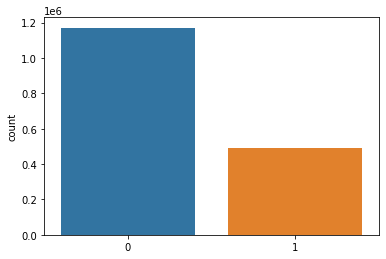

In [ ]:
import seaborn as sns
sns.countplot(y_train)

In [ ]:
print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (1661310, 10)
y train size:  (1661310,)
X test size:  (415328, 10)
y test size:  (415328,)


## before smote

### LR

In [ ]:
from sklearn.linear_model import LogisticRegression
lrclf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
ensemblepred = lrclf.predict(X_test)
print(classification_report(y_test,ensemblepred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97    292721
           1       0.92      0.94      0.93    122607

    accuracy                           0.96    415328
   macro avg       0.95      0.95      0.95    415328
weighted avg       0.96      0.96      0.96    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

stppred = lrclf.predict_proba(X_test)[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,stppred)
auc = metrics.roc_auc_score(y_test,stppred)

In [ ]:
print(auc)

0.9910674229687761


<function matplotlib.pyplot.show>

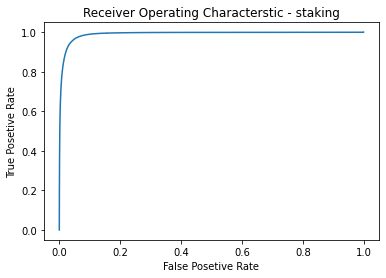

In [ ]:
plt.title('Receiver Operating Characterstic - staking')
plt.plot(fpr,tpr, label = "AUC = %0.5f" % (auc))
plt.ylabel('True Posetive Rate')
plt.xlabel('False Posetive Rate')
plt.show

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BLRmodel.sav'
pickle.dump(lrclf, open(filename, 'wb'))

### NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
ensemblepred = gnb.predict(X_test)
print(classification_report(y_test,ensemblepred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90    292721
           1       0.78      0.69      0.73    122607

    accuracy                           0.85    415328
   macro avg       0.83      0.80      0.81    415328
weighted avg       0.85      0.85      0.85    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

stppred = gnb.predict_proba(X_test)[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,stppred)
auc = metrics.roc_auc_score(y_test,stppred)

In [ ]:
print(auc)

0.9204801760482635


<function matplotlib.pyplot.show>

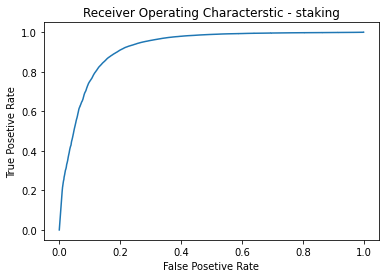

In [ ]:
plt.title('Receiver Operating Characterstic - staking')
plt.plot(fpr,tpr, label = "AUC = %0.5f" % (auc))
plt.ylabel('True Posetive Rate')
plt.xlabel('False Posetive Rate')
plt.show

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BNBmodel.sav'
pickle.dump(gnb, open(filename, 'wb'))

### ST

In [ ]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# define the base models
estimators = []
model1 = LogisticRegression()
estimators.append(('lr', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model4 = GaussianNB()
estimators.append(('nb', model4))

# define meta learner model
level1 = LogisticRegression()

# define the stacking ensemble
ensemble = StackingClassifier(estimators=estimators,  final_estimator=level1).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
ensemblepred = ensemble.predict(X_test)
print(classification_report(y_test,ensemblepred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    292721
           1       0.96      0.95      0.96    122607

    accuracy                           0.98    415328
   macro avg       0.97      0.97      0.97    415328
weighted avg       0.98      0.98      0.98    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

stppred = ensemble.predict_proba(X_test)[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,stppred)
auc = metrics.roc_auc_score(y_test,stppred)

In [ ]:
print(auc)

0.9951587790976987


<function matplotlib.pyplot.show>

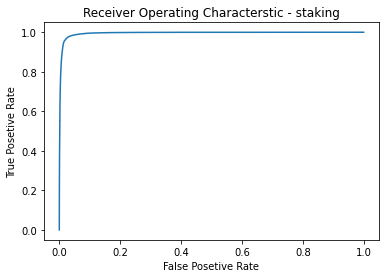

In [ ]:
plt.title('Receiver Operating Characterstic - staking')
plt.plot(fpr,tpr, label = "AUC = %0.5f" % (auc))
plt.ylabel('True Posetive Rate')
plt.xlabel('False Posetive Rate')
plt.show

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BSTmodel_untn.sav'
pickle.dump(ensemble, open(filename, 'wb'))

### VT

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
# create the sub models

# define the base models
estimators = []
model1 = LogisticRegression()
estimators.append(('lr', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model4 = GaussianNB()
estimators.append(('nb', model4))


# create the ensemble model
VTensemble = VotingClassifier(estimators,voting='soft').fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
ensemblepred = VTensemble.predict(X_test)
print(classification_report(y_test,ensemblepred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98    292721
           1       0.94      0.96      0.95    122607

    accuracy                           0.97    415328
   macro avg       0.96      0.97      0.96    415328
weighted avg       0.97      0.97      0.97    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

stppred = VTensemble.predict_proba(X_test)[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,stppred)
auc = metrics.roc_auc_score(y_test,stppred)

In [ ]:
print(auc)

0.9919460657691941


<function matplotlib.pyplot.show>

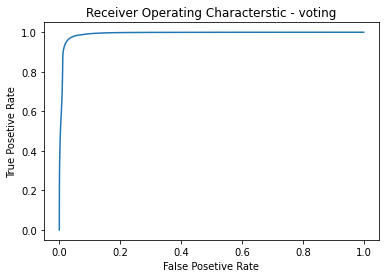

In [ ]:
plt.title('Receiver Operating Characterstic - voting')
plt.plot(fpr,tpr, label = "AUC = %0.5f" % (auc))
plt.ylabel('True Posetive Rate')
plt.xlabel('False Posetive Rate')
plt.show

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BVTmodel_untn.sav'
pickle.dump(VTensemble, open(filename, 'wb'))

## After smote

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

#### ST

In [ ]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# define the base models
estimators = []
model1 = LogisticRegression()
estimators.append(('lr', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model4 = GaussianNB()
estimators.append(('nb', model4))

# define meta learner model
level1 = LogisticRegression()

# define the stacking ensemble
ensemble = StackingClassifier(estimators=estimators,  final_estimator=level1).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
ensemblepred = ensemble.predict(X_test)
print(classification_report(y_test,ensemblepred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    292721
           1       0.96      0.96      0.96    122607

    accuracy                           0.98    415328
   macro avg       0.97      0.97      0.97    415328
weighted avg       0.98      0.98      0.98    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

stppred = ensemble.predict_proba(X_test)[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,stppred)
auc = metrics.roc_auc_score(y_test,stppred)

In [ ]:
print(auc)

0.9951399344692413


<function matplotlib.pyplot.show>

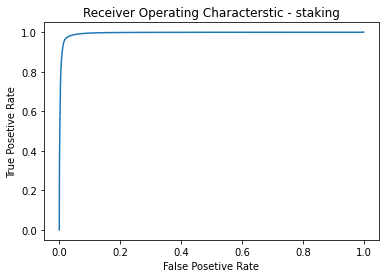

In [ ]:
plt.title('Receiver Operating Characterstic - staking')
plt.plot(fpr,tpr, label = "AUC = %0.5f" % (auc))
plt.ylabel('True Posetive Rate')
plt.xlabel('False Posetive Rate')
plt.show

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BSTmodel_untn_sm.sav'
pickle.dump(ensemble, open(filename, 'wb'))

#### tuning ST

In [ ]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# define the base models
estimators = []
model1 = LogisticRegression()
estimators.append(('lr', model1))
model2 = DecisionTreeClassifier()
estimators.append(('dt', model2))
model4 = GaussianNB()
estimators.append(('nb', model4))

# define meta learner model
level1 = LogisticRegression()

# define the stacking ensemble
ensemble = StackingClassifier(estimators=estimators,  final_estimator=level1, stack_method='predict', n_jobs=-1)

params = {'dt__criterion': ['gini','entropy'],
          'dt__max_depth':[10,20,50],
      'lr__C':[0.05,0.1,0.5,1],
      'nb__var_smoothing': np.logspace(0,-9, num=100)
      }

grid=HalvingGridSearchCV(ensemble, params,cv=10).fit(X_train, y_train)

KeyboardInterrupt: ignored

#### VT

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
# create the sub models

# define the base models
estimators = []
model1 = LogisticRegression()
estimators.append(('lr', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model4 = GaussianNB()
estimators.append(('nb', model4))


# create the ensemble model
VTensemble = VotingClassifier(estimators,voting='soft').fit(X_train, y_train)

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
ensemblepred = VTensemble.predict(X_test)
print(classification_report(y_test,ensemblepred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98    292721
           1       0.91      0.98      0.94    122607

    accuracy                           0.97    415328
   macro avg       0.95      0.97      0.96    415328
weighted avg       0.97      0.97      0.97    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

stppred = VTensemble.predict_proba(X_test)[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,stppred)
auc = metrics.roc_auc_score(y_test,stppred)

In [ ]:
print(auc)

0.9920570543746865


<function matplotlib.pyplot.show>

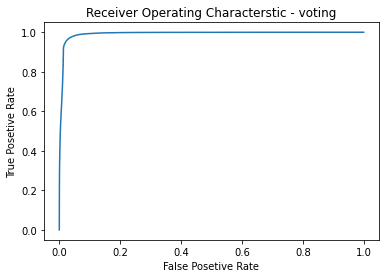

In [ ]:
plt.title('Receiver Operating Characterstic - voting')
plt.plot(fpr,tpr, label = "AUC = %0.5f" % (auc))
plt.ylabel('True Posetive Rate')
plt.xlabel('False Posetive Rate')
plt.show

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BVTmodel_untn_sm.sav'
pickle.dump(VTensemble, open(filename, 'wb'))

#### tuning VT

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# define the base models
estimators = []
model1 = LogisticRegression()
estimators.append(('lr', model1))
model2 = DecisionTreeClassifier()
estimators.append(('dt', model2))
model4 = GaussianNB()
estimators.append(('nb', model4))


# create the ensemble model
VTensemble = VotingClassifier(estimators,voting='soft')

params = {'dt__criterion': ['gini','entropy'],
          'dt__max_depth':[10,20,50],
          'lr__max_iter' : [1000,2000, 2500],
      'lr__C':[0.05,0.1,0.5,1],
      'nb__var_smoothing': np.logspace(0,-9, num=100)
      }

grid=HalvingGridSearchCV(VTensemble, params,cv=10).fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
ensemblepred = grid.predict(X_test)
print(classification_report(y_test,ensemblepred))

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

stppred = grid.predict_proba(X_test)[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,stppred)
auc = metrics.roc_auc_score(y_test,stppred)
print(auc)

In [ ]:
plt.title('Receiver Operating Characterstic - voting')
plt.plot(fpr,tpr, label = "AUC = %0.5f" % (auc))
plt.ylabel('True Posetive Rate')
plt.xlabel('False Posetive Rate')
plt.show

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BVTmodel_tn_sm.sav'
pickle.dump(VTensemble, open(filename, 'wb'))

#### LR

In [ ]:
from sklearn.linear_model import LogisticRegression
lrclf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
ensemblepred = lrclf.predict(X_test)
print(classification_report(y_test,ensemblepred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    292721
           1       0.88      0.97      0.92    122607

    accuracy                           0.95    415328
   macro avg       0.93      0.96      0.94    415328
weighted avg       0.96      0.95      0.95    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
stppred = lrclf.predict_proba(X_test)[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,stppred)
auc = metrics.roc_auc_score(y_test,stppred)

In [ ]:
print(auc)

0.9909382562084261


<function matplotlib.pyplot.show>

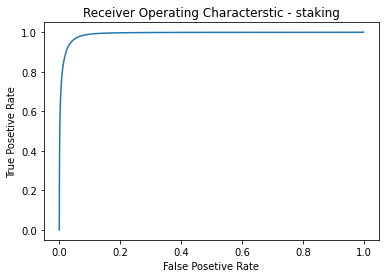

In [ ]:
plt.title('Receiver Operating Characterstic - staking')
plt.plot(fpr,tpr, label = "AUC = %0.5f" % (auc))
plt.ylabel('True Posetive Rate')
plt.xlabel('False Posetive Rate')
plt.show

In [ ]:
import pickle
filename = '/content/drive/My Drive/Colab Notebooks/BLRmodel_sm.sav'
pickle.dump(lrclf, open(filename, 'wb'))

##### tuning LR

In [ ]:
param_grid=  {'C' : [0.001,0.01,0.1,1,10,100,1000],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
}

In [ ]:
# grid search
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv 
# now import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV

lr_model = LogisticRegression()
C = [0.001,0.01,0.1,1,10,100,1000]

#param_grid = dict(C=C)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = HalvingGridSearchCV(lr_model, param_grid, scoring="neg_log_loss", cv=kfold, n_jobs=-1,verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Minimum loss of %f is achieved using %s" % (grid_result.best_score_, grid_result.best_params_))

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 28910
max_resources_: 2341770
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 140
n_resources: 28910
Fitting 10 folds for each of 140 candidates, totalling 1400 fits
----------
iter: 1
n_candidates: 47
n_resources: 86730
Fitting 10 folds for each of 47 candidates, totalling 470 fits
----------
iter: 2
n_candidates: 16
n_resources: 260190
Fitting 10 folds for each of 16 candidates, totalling 160 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


----------
iter: 3
n_candidates: 6
n_resources: 780570
Fitting 10 folds for each of 6 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


----------
iter: 4
n_candidates: 2
n_resources: 2341710
Fitting 10 folds for each of 2 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Minimum loss of -0.109573 is achieved using {'C': 100, 'max_iter': 2500, 'solver': 'newton-cg'}


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.109573 using {'C': 100, 'max_iter': 2500, 'solver': 'newton-cg'}
-0.128552 (0.005329) with: {'C': 0.001, 'max_iter': 100, 'solver': 'lbfgs'}
-0.128536 (0.005310) with: {'C': 0.001, 'max_iter': 100, 'solver': 'newton-cg'}
-0.148914 (0.005633) with: {'C': 0.001, 'max_iter': 100, 'solver': 'liblinear'}
-0.148569 (0.004816) with: {'C': 0.001, 'max_iter': 100, 'solver': 'sag'}
-0.157223 (0.005071) with: {'C': 0.001, 'max_iter': 100, 'solver': 'saga'}
-0.128536 (0.005309) with: {'C': 0.001, 'max_iter': 1000, 'solver': 'lbfgs'}
-0.128536 (0.005310) with: {'C': 0.001, 'max_iter': 1000, 'solver': 'newton-cg'}
-0.148914 (0.005633) with: {'C': 0.001, 'max_iter': 1000, 'solver': 'liblinear'}
-0.138058 (0.004658) with: {'C': 0.001, 'max_iter': 1000, 'solver': 'sag'}
-0.142140 (0.004871) with: {'C': 0.001, 'max_iter': 1000, 'solver': 'saga'}
-0.128536 (0.005309) with: {'C': 0.001, 'max_iter': 2500, 'solver': 'lbfgs'}
-0.128536 (0.005310) with: {'C': 0.001, 'max_iter': 2500, 'solver': 'newto

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
lrpred = grid_search.predict(X_test)
print(classification_report(y_test,lrpred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    292721
           1       0.89      0.97      0.93    122607

    accuracy                           0.95    415328
   macro avg       0.94      0.96      0.95    415328
weighted avg       0.96      0.95      0.96    415328



In [ ]:
# summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.109573 using {'C': 100, 'max_iter': 2500, 'solver': 'newton-cg'}
-0.128552 (0.005329) with: {'C': 0.001, 'max_iter': 100, 'solver': 'lbfgs'}
-0.128536 (0.005310) with: {'C': 0.001, 'max_iter': 100, 'solver': 'newton-cg'}
-0.148914 (0.005633) with: {'C': 0.001, 'max_iter': 100, 'solver': 'liblinear'}
-0.148569 (0.004816) with: {'C': 0.001, 'max_iter': 100, 'solver': 'sag'}
-0.157223 (0.005071) with: {'C': 0.001, 'max_iter': 100, 'solver': 'saga'}
-0.128536 (0.005309) with: {'C': 0.001, 'max_iter': 1000, 'solver': 'lbfgs'}
-0.128536 (0.005310) with: {'C': 0.001, 'max_iter': 1000, 'solver': 'newton-cg'}
-0.148914 (0.005633) with: {'C': 0.001, 'max_iter': 1000, 'solver': 'liblinear'}
-0.138058 (0.004658) with: {'C': 0.001, 'max_iter': 1000, 'solver': 'sag'}
-0.142140 (0.004871) with: {'C': 0.001, 'max_iter': 1000, 'solver': 'saga'}
-0.128536 (0.005309) with: {'C': 0.001, 'max_iter': 2500, 'solver': 'lbfgs'}
-0.128536 (0.005310) with: {'C': 0.001, 'max_iter': 2500, 'solver': 'newto

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
lrpred = grid_search.predict(X_test)
print(classification_report(y_test,lrpred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97    292721
           1       0.88      0.97      0.92    122607

    accuracy                           0.95    415328
   macro avg       0.93      0.96      0.94    415328
weighted avg       0.96      0.95      0.95    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

stppred = grid_search.predict_proba(X_test)[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,stppred)
auc = metrics.roc_auc_score(y_test,stppred)

In [ ]:
print(auc)

0.9915740292945128


<function matplotlib.pyplot.show>

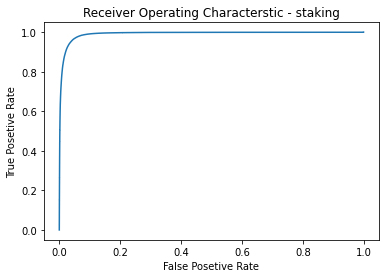

In [ ]:
plt.title('Receiver Operating Characterstic - staking')
plt.plot(fpr,tpr, label = "AUC = %0.5f" % (auc))
plt.ylabel('True Posetive Rate')
plt.xlabel('False Posetive Rate')
plt.show

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


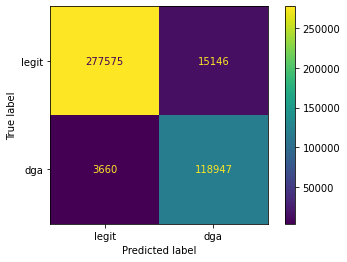

In [ ]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid_search, X_test, y_test, display_labels=["legit", "dga"])

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BLRmodel_sm_tn3.sav'
pickle.dump(grid_search, open(filename, 'wb'))

#### NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
ensemblepred = gnb.predict(X_test)
print(classification_report(y_test,ensemblepred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90    292721
           1       0.76      0.76      0.76    122607

    accuracy                           0.86    415328
   macro avg       0.83      0.83      0.83    415328
weighted avg       0.86      0.86      0.86    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

stppred = gnb.predict_proba(X_test)[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,stppred)
auc = metrics.roc_auc_score(y_test,stppred)

In [ ]:
print(auc)

0.9208826805602081


<function matplotlib.pyplot.show>

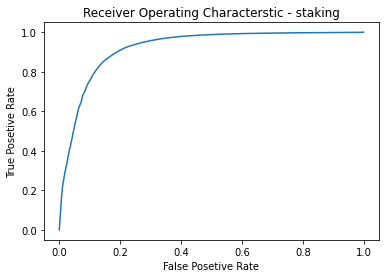

In [ ]:
plt.title('Receiver Operating Characterstic - staking')
plt.plot(fpr,tpr, label = "AUC = %0.5f" % (auc))
plt.ylabel('True Posetive Rate')
plt.xlabel('False Posetive Rate')
plt.show

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BNBmodel_sm.sav'
pickle.dump(gnb, open(filename, 'wb'))

##### tuning NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_halving_search_cv 
# now import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = HalvingGridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 28910
max_resources_: 2341770
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 100
n_resources: 28910
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
----------
iter: 1
n_candidates: 34
n_resources: 86730
Fitting 10 folds for each of 34 candidates, totalling 340 fits
----------
iter: 2
n_candidates: 12
n_resources: 260190
Fitting 10 folds for each of 12 candidates, totalling 120 fits
----------
iter: 3
n_candidates: 4
n_resources: 780570
Fitting 10 folds for each of 4 candidates, totalling 40 fits
----------
iter: 4
n_candidates: 2
n_resources: 2341710
Fitting 10 folds for each of 2 candidates, totalling 20 fits
GaussianNB(var_smoothing=0.005336699231206307)


In [ ]:
# summarize results
print("Best: %f using %s" % (nbModel_grid.best_score_, nbModel_grid.best_params_))
means = nbModel_grid.cv_results_['mean_test_score']
stds = nbModel_grid.cv_results_['std_test_score']
params = nbModel_grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.903660 using {'var_smoothing': 0.005336699231206307}
0.644898 (0.004848) with: {'var_smoothing': 1.0}
0.643999 (0.005213) with: {'var_smoothing': 0.8111308307896871}
0.643238 (0.005258) with: {'var_smoothing': 0.657933224657568}
0.642823 (0.006008) with: {'var_smoothing': 0.533669923120631}
0.641785 (0.006053) with: {'var_smoothing': 0.43287612810830584}
0.641646 (0.005580) with: {'var_smoothing': 0.3511191734215131}
0.642442 (0.005586) with: {'var_smoothing': 0.2848035868435802}
0.643756 (0.005701) with: {'var_smoothing': 0.23101297000831597}
0.645071 (0.005739) with: {'var_smoothing': 0.1873817422860384}
0.647112 (0.005556) with: {'var_smoothing': 0.15199110829529336}
0.649914 (0.005640) with: {'var_smoothing': 0.12328467394420659}
0.653615 (0.005494) with: {'var_smoothing': 0.1}
0.657835 (0.006185) with: {'var_smoothing': 0.08111308307896872}
0.664856 (0.007098) with: {'var_smoothing': 0.0657933224657568}
0.673400 (0.007586) with: {'var_smoothing': 0.0533669923120631}
0.6833

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
ensemblepred = nbModel_grid.predict(X_test)
print(classification_report(y_test,ensemblepred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91    292721
           1       0.72      0.96      0.82    122607

    accuracy                           0.88    415328
   macro avg       0.85      0.90      0.87    415328
weighted avg       0.90      0.88      0.88    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

stppred = nbModel_grid.predict_proba(X_test)[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,stppred)
auc = metrics.roc_auc_score(y_test,stppred)

In [ ]:
print(auc)

0.966960558394981


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BNBmodel_sm_tn.sav'
pickle.dump(gnb, open(filename, 'wb'))

### Bar Graph

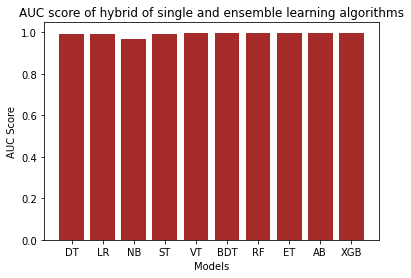

In [ ]:
AUC=[0.994,0.991,0.967,0.990,0.998,0.998,0.998,0.997,0.995,0.997]
X = ['DT','LR','NB','ST','VT','BDT','RF','ET','AB','XGB']
#Plot On the x-axis the size of the file and on y-axis plot the time taken by the Spark to compute the result.
x_pos = [i for i, _ in enumerate(AUC)]
plt.bar(x_pos, AUC, color='brown')
plt.xlabel("Models")
plt.ylabel("AUC Score")
plt.title("AUC score of hybrid of single and ensemble learning algorithms")
plt.xticks(x_pos, X)
plt.show()        

No handles with labels found to put in legend.


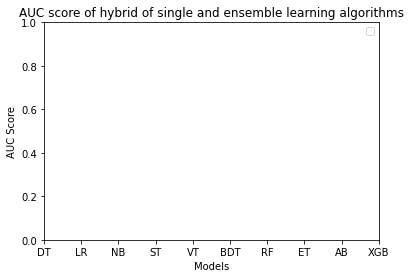

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
AUC=[0.994,0.991,0.967,0.990,0.998,0.998,0.998,0.997,0.995,0.997]
X = ['DT','LR','NB','ST','VT','BDT','RF','ET','AB','XGB']
#Plot On the x-axis the size of the file and on y-axis plot the time taken by the Spark to compute the result.
x_pos = [i for i, _ in enumerate(AUC)]
#plt.bar(x_pos, computeTimes, color='blue')
X_axis = np.arange(len(X))
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("AUC Score")
plt.title("AUC score of hybrid of single and ensemble learning algorithms")
plt.legend()
plt.show()

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['LR','RF','ET','AB', 'NB', 'DT','XGB']
CNN = [0.993, 0.997, 0.998, 0.994, 0.982, 0.965, 0.996]
LSTM = [0.998, 0.998, 0.998, 0.998, 0.993, 0.980, 0.998]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, CNN, 0.4, label = 'CNN')
plt.bar(X_axis + 0.2, LSTM, 0.4, label = 'LSTM')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("AUC Score")
plt.title("AUC score of hybrid of CNN and LSTM with machine learning algorithms")
plt.legend()
plt.show()

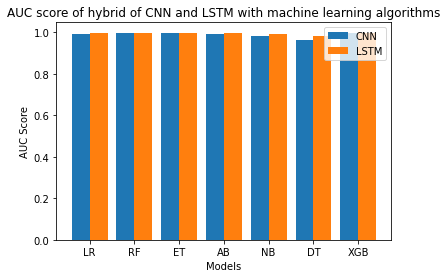

In [ ]:

import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['LR','RF','ET','AB', 'NB', 'DT','XGB']
CNN = [0.993, 0.997, 0.998, 0.994, 0.982, 0.965, 0.996]
LSTM = [0.998, 0.998, 0.998, 0.998, 0.993, 0.980, 0.998]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, CNN, 0.4, label = 'CNN')
plt.bar(X_axis + 0.2, LSTM, 0.4, label = 'LSTM')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("AUC Score")
plt.title("AUC score of hybrid of CNN and LSTM with machine learning algorithms")
plt.legend()
plt.show()

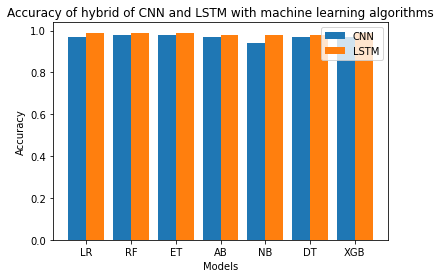

In [ ]:
X = ['LR','RF','ET','AB', 'NB', 'DT','XGB']
CNN = [0.97, 0.98, 0.98, 0.97, 0.94,0.97, 0.97]
LSTM = [0.99, 0.99, 0.99, 0.98, 0.98, 0.98, 0.99]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, CNN, 0.4, label = 'CNN')
plt.bar(X_axis + 0.2, LSTM, 0.4, label = 'LSTM')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of hybrid of CNN and LSTM with machine learning algorithms")
plt.legend()
plt.show()

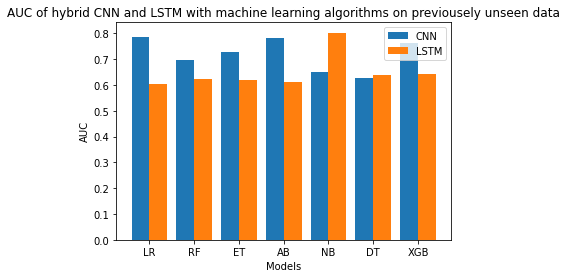

In [ ]:
X = ['LR','RF','ET','AB', 'NB', 'DT','XGB']
LSTM = [0.603, 0.625, 0.619, 0.612, 0.803, 0.639, 0.642]
CNN = [0.785, 0.698, 0.729, 0.782, 0.649, 0.629, 0.764]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, CNN, 0.4, label = 'CNN')
plt.bar(X_axis + 0.2, LSTM, 0.4, label = 'LSTM')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("AUC")
plt.title("AUC of hybrid CNN and LSTM with machine learning algorithms on previousely unseen data")
plt.legend()
plt.show()

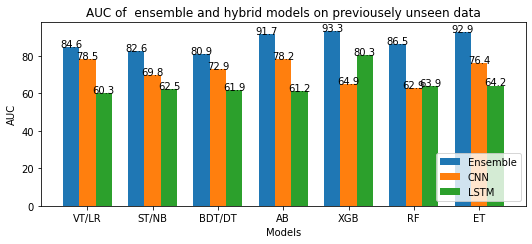

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 7
ind = np.arange(N) 
width = 0.25
fig, ax = plt.subplots()

Ensemble= [84.6,82.6,80.9,91.7,93.3,86.5,92.9]
bar1 = ax.bar(ind, Ensemble, width)
 
CNN = [78.5, 69.8, 72.9, 78.2, 64.9, 62.9,76.4]
bar2 = ax.bar(ind+width, CNN, width)

LSTM = [60.3, 62.5, 61.9,61.2, 80.3, 63.9, 64.2] 
bar3 = ax.bar(ind+width*2, LSTM, width)

for p in bar1:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}".format(height),
      ha='center')
for p in bar2:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}".format(height),
      ha='center')
for p in bar3:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}".format(height),
      ha='center')
   
plt.xlabel("Models")
plt.ylabel("AUC")
plt.title("AUC of  ensemble and hybrid models on previousely unseen data")
  
plt.xticks(ind+width,['VT/LR','ST/NB','BDT/DT','AB', 'XGB', 'RF','ET'])
plt.legend( (bar1, bar2, bar3), ('Ensemble', 'CNN', 'LSTM'), loc='lower right' )
plt.show()

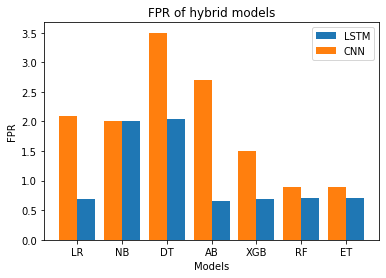

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
X = ['LR','NB','DT','AB', 'XGB', 'RF','ET']
LSTM= [0.69,2,2.05,0.66,0.69,0.7,0.7]
CNN= [2.1,2,3.5,2.7,1.5,0.9,0.9]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis + 0.2, LSTM, 0.4, label = 'LSTM')
plt.bar(X_axis - 0.2, CNN, 0.4, label = 'CNN')

plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("FPR")
plt.title("FPR of hybrid models")
plt.legend()
plt.show()

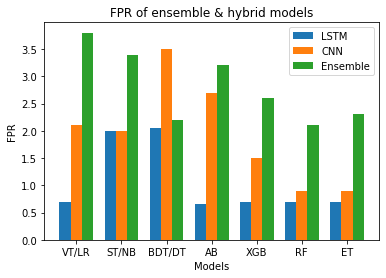

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 7
ind = np.arange(N) 
width = 0.25
  
LSTM= [0.69,2,2.05,0.66,0.69,0.7,0.7]
bar1 = plt.bar(ind, LSTM, width)
  
CNN= [2.1,2,3.5,2.7,1.5,0.9,0.9]
bar2 = plt.bar(ind+width, CNN, width)
  
Ensemble= [3.8,3.4,2.2,3.2,2.6,2.1,2.3]
bar3 = plt.bar(ind+width*2, Ensemble, width)
  
plt.xlabel("Models")
plt.ylabel("FPR")
plt.title("FPR of ensemble & hybrid models")
  
plt.xticks(ind+width,['VT/LR','ST/NB','BDT/DT','AB', 'XGB', 'RF','ET'])
plt.legend( (bar1, bar2, bar3), ('LSTM', 'CNN', 'Ensemble') )
plt.show()

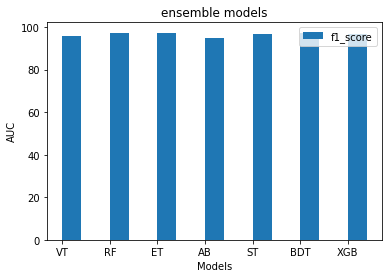

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
X = ['VT','RF','ET','AB', 'ST', 'BDT','XGB']
f1_score= [96.01,97.32,97.21,94.99,96.51,97.18,96.53]
#AUC= [0.995,0.998,0.997,0.995,0.989,0.997,0.997]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis + 0.2, f1_score, 0.4, label = 'f1_score')
#plt.bar(X_axis - 0.2, AUC, 0.4, label = 'AUC')

plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("AUC")
plt.title("ensemble models")
plt.legend()
plt.show()

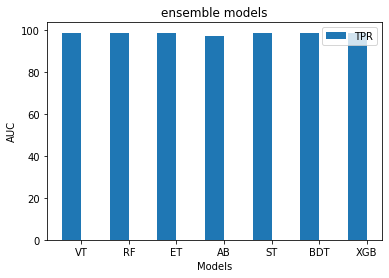

In [ ]:
X = ['VT','RF','ET','AB', 'ST', 'BDT','XGB']
TPR= [98.27, 98.62,98.61,96.82,98.52,98.56,98.57]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, TPR, 0.4, label = 'TPR')

plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("AUC")
plt.title("ensemble models")
plt.legend()
plt.show()

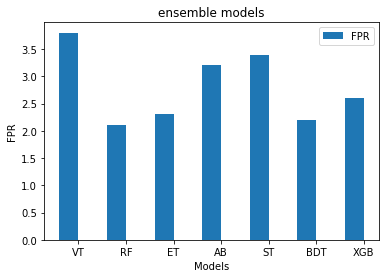

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
X = ['VT','RF','ET','AB', 'ST', 'BDT','XGB']
FPR= [3.8,2.1,2.3,3.2,3.4,2.2,2.6]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, FPR, 0.4, label = 'FPR')

plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("FPR")
plt.title("ensemble models")
plt.legend()
plt.show()

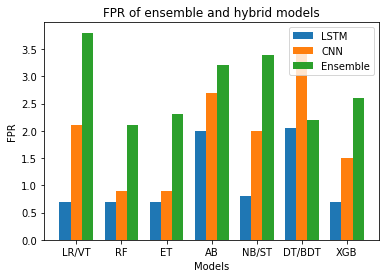

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 7
ind = np.arange(N) 
width = 0.25
  
LSTM = [0.69, 0.7, 0.7, 2, 0.803, 2.05, 0.69]
bar1 = plt.bar(ind, LSTM, width)
  
CNN = [2.1, 0.9, 0.9, 2.7, 2, 3.5, 1.5]
bar2 = plt.bar(ind+width, CNN, width)
  
Ensemble= [3.8,2.1,2.3,3.2,3.4,2.2,2.6]
bar3 = plt.bar(ind+width*2, Ensemble, width)
  
plt.xlabel("Models")
plt.ylabel("FPR")
plt.title("FPR of ensemble and hybrid models")
  
plt.xticks(ind+width,['LR/VT','RF','ET','AB', 'NB/ST', 'DT/BDT','XGB'])
plt.legend( (bar1, bar2, bar3), ('LSTM', 'CNN', 'Ensemble') )
plt.show()

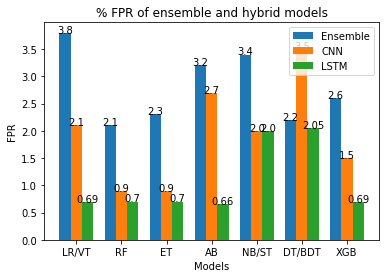

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 7
ind = np.arange(N) 
width = 0.25
fig, ax = plt.subplots()
  
Ensemble= [3.8,2.1,2.3,3.2,3.4,2.2,2.6]
bar1 = plt.bar(ind, Ensemble, width)
  
CNN = [2.1, 0.9, 0.9, 2.7, 2, 3.5, 1.5]
bar2 = plt.bar(ind+width, CNN, width)
  
LSTM = [0.69, 0.7, 0.7, 0.66, 2, 2.05, 0.69]
bar3 = plt.bar(ind+width*2, LSTM, width)

for p in bar1:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}".format(height),
      ha='center')
for p in bar2:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}".format(height),
      ha='center')
for p in bar3:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}".format(height),
      ha='center')
    
plt.xlabel("Models")
plt.ylabel("FPR")
plt.title("% FPR of ensemble and hybrid models")
  
plt.xticks(ind+width,['LR/VT','RF','ET','AB', 'NB/ST', 'DT/BDT','XGB'])
plt.legend( (bar1, bar2, bar3), ('Ensemble', 'CNN', 'LSTM'), loc='upper right')
plt.show()

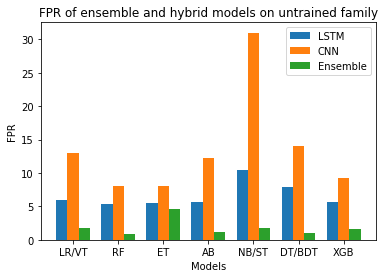

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 7
ind = np.arange(N) 
width = 0.25
  
LSTM = [5.9, 5.4, 5.5, 5.6,10.4, 7.9, 5.7]
bar1 = plt.bar(ind, LSTM, width)
  
CNN = [13, 8, 8.1, 12.3, 31, 14, 9.2]
bar2 = plt.bar(ind+width, CNN, width)
  
Ensemble= [1.7,0.9,4.6,1.1,1.7,1,1.6]
bar3 = plt.bar(ind+width*2, Ensemble, width)
  
plt.xlabel("Models")
plt.ylabel("FPR")
plt.title("FPR of ensemble and hybrid models on untrained family")
  
plt.xticks(ind+width,['LR/VT','RF','ET','AB', 'NB/ST', 'DT/BDT','XGB'])
plt.legend( (bar1, bar2, bar3), ('LSTM', 'CNN', 'Ensemble') )
plt.show()

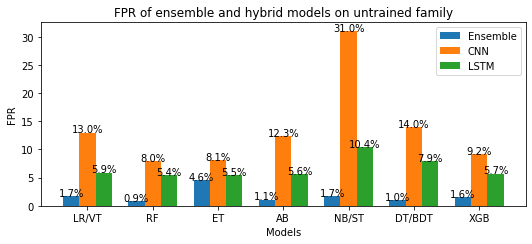

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 7
ind = np.arange(N) 
width = 0.25
fig, ax = plt.subplots()
  
Ensemble= [1.7,0.9,4.6,1.1,1.7,1,1.6]
bar1 = plt.bar(ind, Ensemble, width)
  
CNN = [13, 8, 8.1, 12.3, 31, 14, 9.2]
bar2 = plt.bar(ind+width, CNN, width)
  
LSTM = [5.9, 5.4, 5.5, 5.6,10.4, 7.9, 5.7]
bar3 = plt.bar(ind+width*2, LSTM, width)

for p in bar1:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}%".format(height),
      ha='center')
for p in bar2:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}%".format(height),
      ha='center')
for p in bar3:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}%".format(height),
      ha='center')
    
plt.xlabel("Models")
plt.ylabel("FPR")
plt.title("FPR of ensemble and hybrid models on untrained family")
  
plt.xticks(ind+width,['LR/VT','RF','ET','AB', 'NB/ST', 'DT/BDT','XGB'])
plt.legend( (bar1, bar2, bar3), ('Ensemble', 'CNN', 'LSTM'))
plt.show()

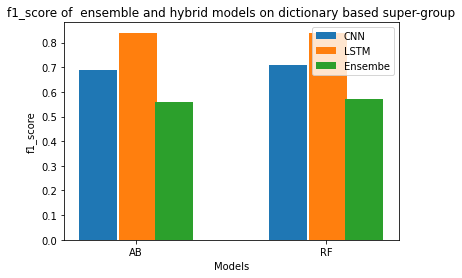

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
X = ['AB','RF']
CNN = [0.69, 0.71]
LSTM = [0.84, 0.84]
Ensembe= [0.56,0.57]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, CNN, 0.2, label = 'CNN')
plt.bar(X_axis + 0.01, LSTM, 0.2, label = 'LSTM')
plt.bar(X_axis + 0.2, Ensembe, 0.2, label = 'Ensembe')

plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("f1_score")
plt.title("f1_score of  ensemble and hybrid models on dictionary based super-group")
plt.legend()
plt.show()

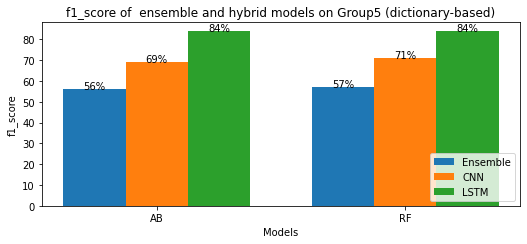

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 2
ind = np.arange(N) 
width = 0.25
fig, ax = plt.subplots()
  
Ensemble= [56,57]
bar1 = plt.bar(ind, Ensemble, width)
  
CNN = [69, 71]
bar2 = plt.bar(ind+width, CNN, width)
  
LSTM = [84, 84]
bar3 = plt.bar(ind+width*2, LSTM, width)

for p in bar1:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}%".format(height),
      ha='center')
for p in bar2:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}%".format(height),
      ha='center')
for p in bar3:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}%".format(height),
      ha='center')
    
plt.xlabel("Models")
plt.ylabel('f1_score')
plt.title("f1_score of  ensemble and hybrid models on Group5 (dictionary-based)")
  
plt.xticks(ind+width,['AB','RF'])
plt.legend( (bar1, bar2, bar3), ('Ensemble', 'CNN', 'LSTM'), loc ="lower right")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 2
ind = np.arange(N) 
width = 0.25
fig, ax = plt.subplots()

Ensembe= [91,90]
bar1 = ax.bar(ind, Ensembe, width)
  
CNN =  [91,90]
bar2 = ax.bar(ind+width, CNN, width)
  
LSTM = [95, 95]
bar3 = ax.bar(ind+width*2, LSTM, width)
  

for p in bar1:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}%".format(height),
      ha='center')
for p in bar2:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}%".format(height),
      ha='center')
for p in bar3:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}%".format(height),
      ha='center')
   
plt.xlabel("Models")
plt.ylabel("f1_score")
plt.title("f1_score of  ensemble and hybrid models on Group4 (hexadecimal based)")
  
plt.xticks(ind+width,['AB','RF'])
plt.legend( (bar1, bar2, bar3), ('Ensembe', 'CNN', 'LSTM'), loc ="lower right")
plt.show()

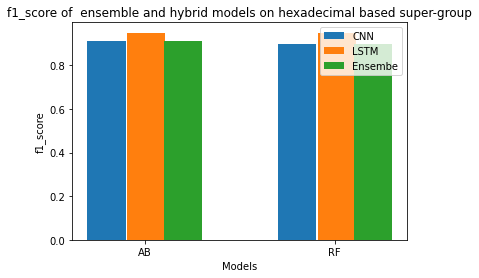

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
X = ['AB','RF']
CNN = [0.91,0.90]
LSTM = [0.95, 0.95]
Ensembe= [0.91,0.90]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, CNN, 0.2, label = 'CNN')
plt.bar(X_axis + 0.01, LSTM, 0.2, label = 'LSTM')
plt.bar(X_axis + 0.2, Ensembe, 0.2, label = 'Ensembe')

plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("f1_score")
plt.title("f1_score of  ensemble and hybrid models on hexadecimal based super-group")
plt.legend()
plt.show()

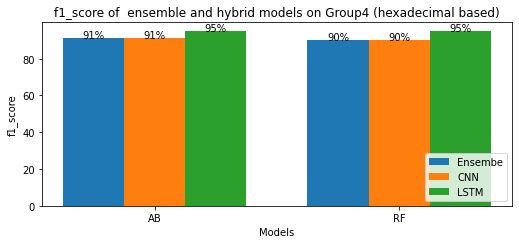

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 2
ind = np.arange(N) 
width = 0.25
fig, ax = plt.subplots()

Ensembe= [91,90]
bar1 = ax.bar(ind, Ensembe, width)
  
CNN =  [91,90]
bar2 = ax.bar(ind+width, CNN, width)
  
LSTM = [95, 95]
bar3 = ax.bar(ind+width*2, LSTM, width)
  

for p in bar1:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}%".format(height),
      ha='center')
for p in bar2:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}%".format(height),
      ha='center')
for p in bar3:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}%".format(height),
      ha='center')
   
plt.xlabel("Models")
plt.ylabel("f1_score")
plt.title("f1_score of  ensemble and hybrid models on Group4 (hexadecimal based)")
  
plt.xticks(ind+width,['AB','RF'])
plt.legend( (bar1, bar2, bar3), ('Ensembe', 'CNN', 'LSTM'), loc ="lower right")
plt.show()

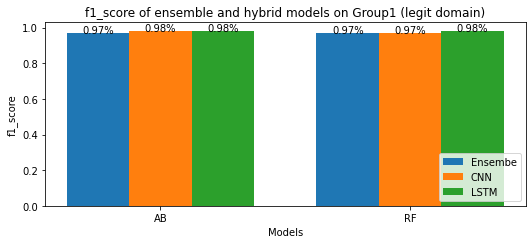

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 2
ind = np.arange(N) 
width = 0.25
fig, ax = plt.subplots()

Ensembe= [0.97,0.97]
bar1 = ax.bar(ind, Ensembe, width)
  
CNN = [0.98, 0.97]
bar2 = ax.bar(ind+width, CNN, width)
  
LSTM = [0.98, 0.98]
bar3 = ax.bar(ind+width*2, LSTM, width)
  

for p in bar1:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}%".format(height),
      ha='center')
for p in bar2:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}%".format(height),
      ha='center')
for p in bar3:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}%".format(height),
      ha='center')
   
plt.xlabel("Models")
plt.ylabel("f1_score")
plt.title("f1_score of ensemble and hybrid models on Group1 (legit domain)")
  
plt.xticks(ind+width,['AB','RF'])
plt.legend( (bar1, bar2, bar3), ('Ensembe', 'CNN', 'LSTM'), loc ="lower right")
plt.show()

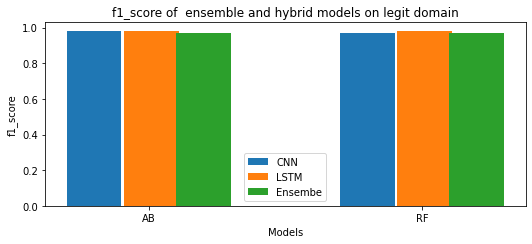

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
X = ['AB','RF']
CNN = [0.98, 0.97]
LSTM = [0.98, 0.98]
Ensembe= [0.97,0.97]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, CNN, 0.2, label = 'CNN')
plt.bar(X_axis + 0.01, LSTM, 0.2, label = 'LSTM')
plt.bar(X_axis + 0.2, Ensembe, 0.2, label = 'Ensembe')
  
plt.xlabel("Models")
plt.ylabel("f1_score")
plt.title("f1_score of  ensemble and hybrid models on legit domain")
plt.xticks(X_axis, X)
plt.legend()
plt.show()

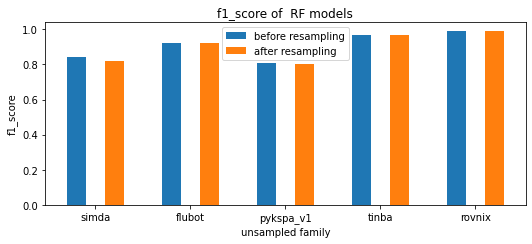

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
X = ['simda','flubot','pykspa_v1','tinba','rovnix']
before_SMOTE = [0.84, 0.92,0.81,0.97,0.99]
after_SMOTE = [0.82, 0.92,0.80,0.97,0.99]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, before_SMOTE, 0.2, label = 'before resampling')
plt.bar(X_axis + 0.2, after_SMOTE, 0.2, label = 'after resampling')

plt.xticks(X_axis, X)
plt.xlabel("unsampled family")
plt.ylabel("f1_score")
plt.title("f1_score of  RF models")
plt.legend()
plt.show()

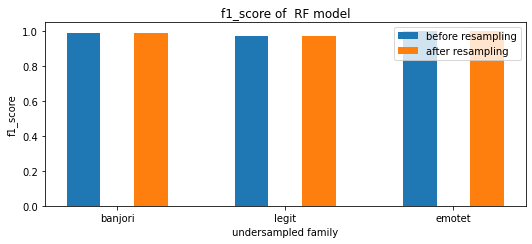

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
X = ['banjori','legit','emotet']
before_SMOTE = [0.99,0.97,1.00]
after_SMOTE = [0.99,0.97,1.00]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, before_SMOTE, 0.2, label = 'before resampling')
plt.bar(X_axis + 0.2, after_SMOTE, 0.2, label = 'after resampling')

plt.xticks(X_axis, X)
plt.xlabel("undersampled family")
plt.ylabel("f1_score")
plt.title("f1_score of  RF model")
plt.legend()
plt.show()

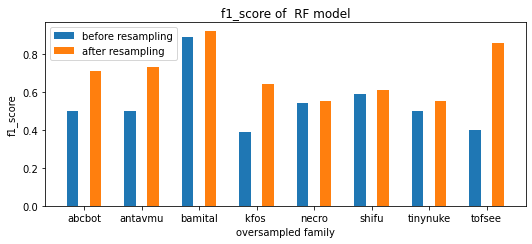

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
X = ["abcbot",'antavmu','bamital','kfos ','necro','shifu','tinynuke','tofsee']
before_SMOTE = [0.50, 0.50,0.89,0.39,0.54,0.59,0.50, 0.40]
after_SMOTE = [	0.71,0.73,0.92,0.64,0.55,0.61,0.55,0.86]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, before_SMOTE, 0.2, label = 'before resampling')
plt.bar(X_axis + 0.2, after_SMOTE, 0.2, label = 'after resampling')

plt.xticks(X_axis, X)
plt.xlabel("oversampled family")
plt.ylabel("f1_score")
plt.title("f1_score of  RF model")
plt.legend()
plt.show()

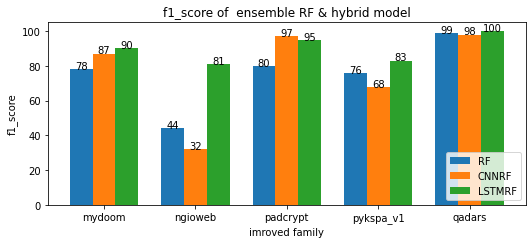

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 5
ind = np.arange(N) 
width = 0.25
fig, ax = plt.subplots()

RF = [78,44,80,76,99]
bar1 = ax.bar(ind, RF, width)
    
CNNRF = [87,32,97,68,98]
bar2 = ax.bar(ind+width, CNNRF, width)

LSTMRF = [90,81,95,83,100]
bar3 = ax.bar(ind+width*2, LSTMRF, width)

for p in bar1:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}".format(height),
      ha='center')
for p in bar2:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}".format(height),
      ha='center')
for p in bar3:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}".format(height),
      ha='center')
   
plt.xlabel("imroved family")
plt.ylabel('f1_score')
plt.title("f1_score of  ensemble RF & hybrid model")
  
plt.xticks(ind+width,['mydoom','ngioweb','padcrypt','pykspa_v1','qadars'])
plt.legend( (bar1, bar2, bar3), ('RF', 'CNNRF', 'LSTMRF'),loc='lower right' )
plt.show()

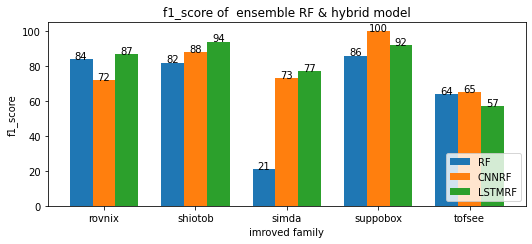

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 5
ind = np.arange(N) 
width = 0.25
fig, ax = plt.subplots()

RF = [84,82,21,86,64]
bar1 = ax.bar(ind, RF, width)
  
CNNRF = [72,88,73,100,65]
bar2 = ax.bar(ind+width, CNNRF, width)
    
LSTMRF = [87,94,77,92,57]
bar3 = ax.bar(ind+width*2, LSTMRF, width)

for p in bar1:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}".format(height),
      ha='center')
for p in bar2:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}".format(height),
      ha='center')
for p in bar3:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}".format(height),
      ha='center')
   
plt.xlabel("imroved family")
plt.ylabel('f1_score')
plt.title("f1_score of  ensemble RF & hybrid model")
  
plt.xticks(ind+width,['rovnix','shiotob','simda','suppobox','tofsee','virut'])
plt.legend( (bar1, bar2, bar3), ('RF', 'CNNRF', 'LSTMRF'), loc='lower right' )
plt.show()

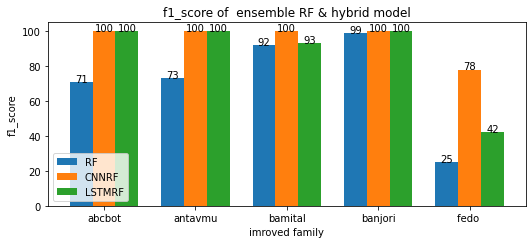

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 5
ind = np.arange(N) 
width = 0.25
fig, ax = plt.subplots()

RF = [71,73,92,99,25]
bar1 = ax.bar(ind, RF, width)

CNNRF = [100,100,100,100,78]
bar2 = ax.bar(ind+width, CNNRF, width)

LSTMRF = [100,100,93,100,42]
bar3 = ax.bar(ind+width*2, LSTMRF, width)

for p in bar1:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}".format(height),
      ha='center')
for p in bar2:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}".format(height),
      ha='center')
for p in bar3:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}".format(height),
      ha='center')
   
plt.xlabel("imroved family")
plt.ylabel('f1_score')
plt.title("f1_score of  ensemble RF & hybrid model")
  
plt.xticks(ind+width,["abcbot",'antavmu','bamital','banjori','fedo '])
plt.legend( (bar1, bar2, bar3), ('RF', 'CNNRF', 'LSTMRF'),loc ="lower left" )
plt.show()

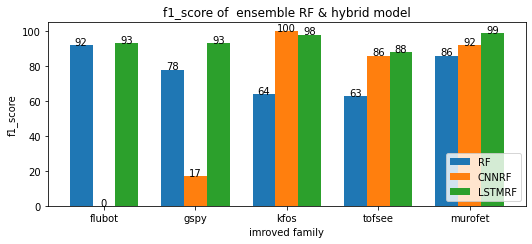

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 5
ind = np.arange(N) 
width = 0.25
fig, ax = plt.subplots()

RF = [92,78,64,63,86]
bar1 = ax.bar(ind, RF, width)

  
CNNRF = [0,17,100,86,92]
bar2 = ax.bar(ind+width, CNNRF, width)

LSTMRF = [93,93,98,88,99]
bar3 = ax.bar(ind+width*2, LSTMRF, width)

for p in bar1:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}".format(height),
      ha='center')
for p in bar2:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}".format(height),
      ha='center')
for p in bar3:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}".format(height),
      ha='center')
   
plt.xlabel("imroved family")
plt.ylabel('f1_score')
plt.title("f1_score of  ensemble RF & hybrid model")
  
plt.xticks(ind+width,['flubot','gspy','kfos','tofsee','murofet'])
plt.legend( (bar1, bar2, bar3), ('RF', 'CNNRF', 'LSTMRF'),loc ="lower right")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 7
ind = np.arange(N) 
width = 0.25
fig, ax = plt.subplots()
  
Ensemble= [1.7,0.9,4.6,1.1,1.7,1,1.6]
bar1 = plt.bar(ind, Ensemble, width)
  
CNN = [13, 8, 8.1, 12.3, 31, 14, 9.2]
bar2 = plt.bar(ind+width, CNN, width)
  
LSTM = [5.9, 5.4, 5.5, 5.6,10.4, 7.9, 5.7]
bar3 = plt.bar(ind+width*2, LSTM, width)

for p in bar1:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}%".format(height),
      ha='center')
for p in bar2:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}%".format(height),
      ha='center')
for p in bar3:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height,
      s="{}%".format(height),
      ha='center')
    
plt.xlabel("Models")
plt.ylabel("FPR")
plt.title("FPR of ensemble and hybrid models on untrained family")
  
plt.xticks(ind+width,['LR/VT','RF','ET','AB', 'NB/ST', 'DT/BDT','XGB'])
plt.legend( (bar1, bar2, bar3), ('Ensemble', 'CNN', 'LSTM'))
plt.show()

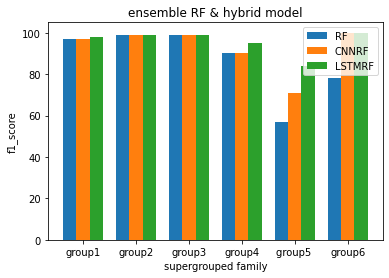

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 6
ind = np.arange(N) 
width = 0.25
  
RF = [97,99,99,90,57,78]
bar1 = plt.bar(ind, RF, width)
  
CNNRF = [97,99,99,90,71,100]
bar2 = plt.bar(ind+width, CNNRF, width)
  
LSTMRF = [98,99,99,95,84,100]
bar3 = plt.bar(ind+width*2, LSTMRF, width)
  
plt.xlabel("supergrouped family")
plt.ylabel('f1_score')
plt.title("ensemble RF & hybrid model")
  
plt.xticks(ind+width,["group1",'group2','group3','group4','group5 ','group6'])
plt.legend( (bar1, bar2, bar3), ('RF', 'CNNRF', 'LSTMRF') )
plt.show()

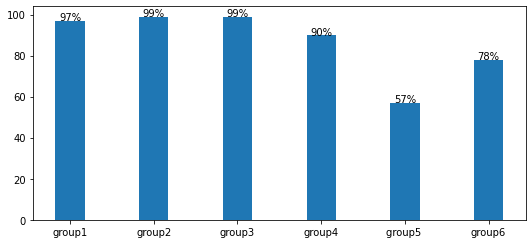

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = ["group1",'group2','group3','group4','group5 ','group6']
RF = [97,99,99,90,57,78]

width = 0.35
fig, ax = plt.subplots()

pps = ax.bar(x, RF, width, align='center')

for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')

plt.show()

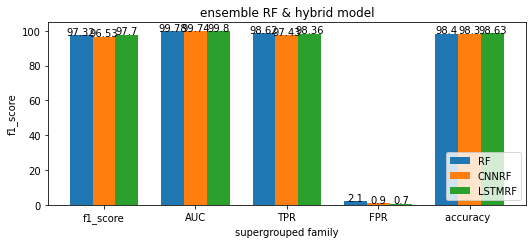

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 5
ind = np.arange(N) 
width = 0.25
fig, ax = plt.subplots()

RF = [97.32,99.78,98.62,2.1,98.40]
bar1 = ax.bar(ind, RF, width)
  
CNNRF = [96.53,99.74,97.43,0.9,98.3]
bar2 = ax.bar(ind+width, CNNRF, width)
  
LSTMRF = [97.70,99.80,98.36,0.7,98.63]
bar3 = ax.bar(ind+width*2, LSTMRF, width)
  

for p in bar1:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}".format(height),
      ha='center')
for p in bar2:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}".format(height),
      ha='center')
for p in bar3:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}".format(height),
      ha='center')
   
plt.xlabel("supergrouped family")
plt.ylabel('f1_score')
plt.title("ensemble RF & hybrid model")
  
plt.xticks(ind+width,["f1_score",'AUC','TPR','FPR','accuracy '])
plt.legend( (bar1, bar2, bar3), ('RF', 'CNNRF', 'LSTMRF'), loc ="lower right")
plt.show()

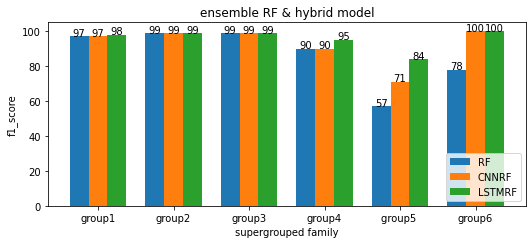

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 6
ind = np.arange(N) 
width = 0.25
fig, ax = plt.subplots()

RF = [97,99,99,90,57,78]
bar1 = ax.bar(ind, RF, width)
  
CNNRF = [97,99,99,90,71,100]
bar2 = ax.bar(ind+width, CNNRF, width)
  
LSTMRF = [98,99,99,95,84,100]
bar3 = ax.bar(ind+width*2, LSTMRF, width)
  

for p in bar1:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}".format(height),
      ha='center')
for p in bar2:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}".format(height),
      ha='center')
for p in bar3:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}".format(height),
      ha='center')
   
plt.xlabel("supergrouped family")
plt.ylabel('f1_score')
plt.title("ensemble RF & hybrid model")
  
plt.xticks(ind+width,["group1",'group2','group3','group4','group5 ','group6'])
plt.legend( (bar1, bar2, bar3), ('RF', 'CNNRF', 'LSTMRF'), loc ="lower right")
plt.show()